<a href="https://colab.research.google.com/github/VincentChong123/sutd-stats-team5-prj/blob/main/Team_5_Project_(JH)_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

We investigated 3 business objectives and presented their respective conclusion and supporting statistical test result.

|Business objective|Finding|Supporting test result|
|-|-|-|
|-|-|-|
|-|-|-|
|-|-|-|


**Normality test using Shapiro-Wilk Test bold text**

tests If data is normally distributed 

**Assumption** : Observations are identically distributed

In [3]:
# Follow PEP08 recommendation, import library first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
import seaborn as sns

In [ ]:
#Data Import
data_dir = ''
mydf = pd.read_csv("Ecommerce - Hour Data.csv")
mydf.columns

#'total_sales', 'gross_sales', 'average_order_value', 'returned_item_quantity', 
#'gross_profit', 'ordered_item_quantity', 'net_quantity', 'product_type'

Index(['hour', 'adjustment', 'cancelled', 'financial_status',
       'fulfillment_status', 'order_id', 'order_name', 'purchase_option',
       'sale_kind', 'sale_line_type', 'cost_tracked', 'billing_company',
       'billing_city', 'billing_region', 'billing_country',
       'billing_postal_code', 'customer_id', 'customer_type',
       'marketing_event_target', 'marketing_event_type',
       'utm_campaign_content', 'utm_campaign_medium', 'utm_campaign_name',
       'utm_campaign_source', 'utm_campaign_term', 'pos_location_name',
       'product_id', 'product_title', 'product_price', 'product_type',
       'product_vendor', 'variant_id', 'variant_sku', 'variant_title',
       'api_client_title', 'shipping_city', 'shipping_region',
       'shipping_country', 'shipping_postal_code', 'staff_id', 'staff_name',
       'id_of_staff_who_helped_with_sale',
       'name_of_staff_who_helped_with_sale', 'referrer_host', 'referrer_name',
       'referrer_path', 'referrer_source', 'referrer_url', 'o

In [2]:
#Checking Histogram
%matplotlib inline
plt.figure(figsize=(14,6))
plt.hist(mydf['total_sales'])
plt.show()

NameError: ignored

<Figure size 1008x432 with 0 Axes>

In [ ]:


DataToTest = mydf['gross_profit']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.38, p=0.000000000000000000000000000000
Not a normal distribution


# Normality test using K^2 Normality Test Test : tests If data is normally distributed 
Assumption : Observations are identically distributed

In [ ]:
# D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = mydf['gross_profit']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not Normally distributed')

stat=5306.8532138382, p=0.0000000000
Not Normally distributed


## Check if the feature: 'gross_profit' is normally distributed using  Anderson-Darling test.

In [ ]:
alpha_value = 0.05
random_seed = 123

In [ ]:
# Anderson-Darling test
from statsmodels.stats.diagnostic import normal_ad

(test_statistic, p_value) = normal_ad(mydf['gross_profit'])      

print("The test statistic is: ", round(test_statistic,3))
print("The p-value is: ", round(p_value,3),"\n")

if p_value < alpha_value:
    print("At", alpha_value, "level of significance, we REJECT null hypothesis.")
    print("Conclusion: Sample likely not follow a normal distribution.")
else:
    print("At", alpha_value, "level of significance, we FAILED TO REJECT null hypothesis.")
    print("Conclusion: Sample likely follow a normal distribution.")

The test statistic is:  inf
The p-value is:  0.0 

At 0.05 level of significance, we REJECT null hypothesis.
Conclusion: Sample likely not follow a normal distribution.


C:\Users\jhoha\anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


## Transform the feature: 'gross_profit'  to better fit the normal distribution using QuantileTransformer

In [ ]:
#Define function for comparing two plots
def compare_plot(feature, transformed_feature):
    plt.rcParams["figure.figsize"] = 13,5
    fig,ax = plt.subplots(1,2)

    stdDev = np.round(np.std(feature)[0],4) # for normal distribution, standard deviation is 1
    skewness = np.round(skew(feature),4) # for normal distribution, skewness = 0
    excess_kurtosis = np.round(kurtosis(feature),4) # for normal distribution, excess kurtosis = 0
    sns.histplot(feature, kde=True, ax=ax[0], legend=False)
    ax[0].set_xlabel(feature.columns[0])
    ax[0].set_title("ORIGINAL \n Standard Dev.: {0} \n Skewness: {1} \n Kurtosis: {2}".format(stdDev, skewness, excess_kurtosis));

    transformed_stdDev = np.round(np.std(transformed_feature)[0],4)
    transformed_skewness = np.round(skew(transformed_feature),4)
    transformed_excess_kurtosis = np.round(kurtosis(transformed_feature),4)
    sns.histplot(transformed_feature, kde=True, ax=ax[1], legend=False)
    ax[1].set_xlabel(feature.columns[0])
    ax[1].set_title("TRANSFORMED \n Standard Dev.: {0} \n Skewness: {1} \n Kurtosis: {2}".format(transformed_stdDev, transformed_skewness, transformed_excess_kurtosis));

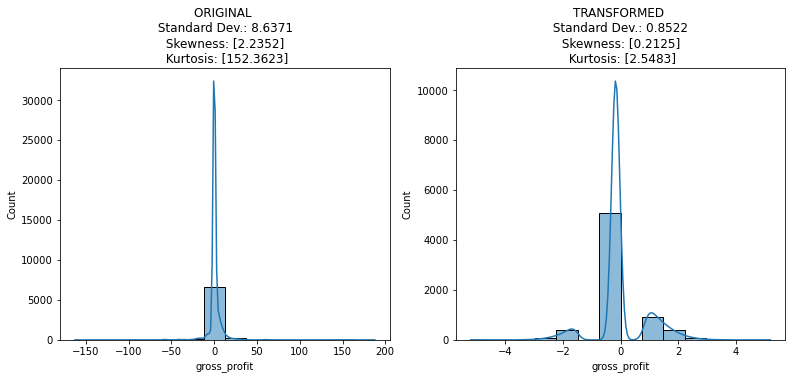

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# Select feature
feature = mydf[["gross_profit"]]

# Transformation
quantile = QuantileTransformer(output_distribution='normal', n_quantiles=len(feature)) # with gaussian output
quantile.fit(feature) # to avoid data leakage, only fit to training data
transformed_feature = quantile.transform(feature) # then perform transform on both training data and test data.
transformed_feature = pd.DataFrame(transformed_feature)

# Plot
compare_plot(feature,transformed_feature)

# Correlation Test - Pearson and Spearman’s Rank Correlation
Asumption - Identical and Normal Distribution

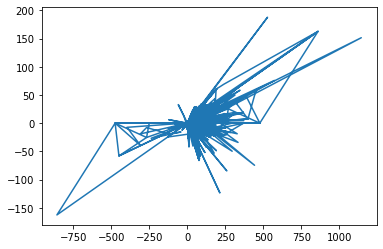

In [ ]:
FirstSample = mydf['total_sales']
SecondSample = mydf['gross_profit']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

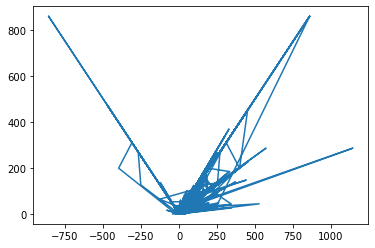

In [ ]:
FirstSample = mydf['total_sales']
SecondSample = mydf['product_price']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

In [ ]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.918, p=0.000000
dependent samples


In [ ]:
mydf.corr(method="pearson")

,order_id,customer_id,marketing_event_target,utm_campaign_term,pos_location_name,product_id,product_price,variant_id,staff_id,staff_name,...,gross_profit,gross_margin,units_per_transaction,customers,pending_sales,net_quantity,ordered_item_quantity,average_units_ordered,returned_item_quantity,percent_of_sales_with_staff_help
order_id,1.000000,0.997766,NaN,NaN,NaN,0.750269,0.383723,0.750235,NaN,NaN,...,0.107938,0.035964,0.564221,0.736046,NaN,0.541221,0.564221,0.564221,-0.091978,NaN
customer_id,0.997766,1.000000,NaN,NaN,NaN,0.754199,0.382410,0.754278,NaN,NaN,...,0.108887,0.036373,0.565289,0.740884,NaN,0.542760,0.565289,0.565289,-0.088681,NaN
marketing_event_target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
utm_campaign_term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos_location_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,0.750269,0.754199,NaN,NaN,NaN,1.000000,0.504208,0.999916,NaN,NaN,...,0.145275,0.049330,0.749569,0.981690,NaN,0.719482,0.749569,0.749569,-0.119028,NaN
product_price,0.383723,0.382410,NaN,NaN,NaN,0.504208,1.000000,0.504691,NaN,NaN,...,0.093489,0.010652,0.312903,0.463157,NaN,0.280157,0.312903,0.312903,-0.186024,NaN
variant_id,0.750235,0.754278,NaN,NaN,NaN,0.999916,0.504691,1.000000,NaN,NaN,...,0.145768,0.049512,0.749650,0.981861,NaN,0.719562,0.749650,0.749650,-0.119028,NaN
staff_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
staff_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


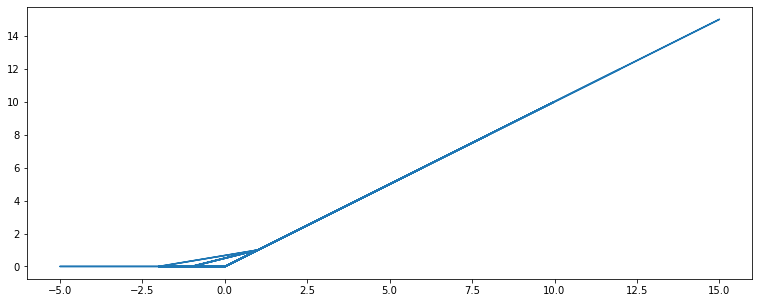

In [ ]:
FirstSample = mydf['net_quantity']
SecondSample = mydf['ordered_item_quantity']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

In [ ]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.991, p=0.000000
dependent samples


# Correlation of categorical variable - Chi square test

In [ ]:
mydf2 = pd.crosstab(mydf['financial_status'], mydf['fulfillment_status'],margins = False)
#mydf2 = pd.crosstab(mydf['product_type'], mydf['shipping_city'],margins = False)
#mydf2 = pd.crosstab(mydf['product_type'], mydf['product_vendor'],margins = False)
#mydf2 = pd.crosstab(mydf['product_type'], mydf['referrer_source'],margins = False)

In [ ]:
mydf2

fulfillment_status,fulfilled,partial,unfulfilled
financial_status,,,
paid,2785,0,17
partially_refunded,43,6,0
refunded,30,0,101


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
stat, p, dof, expected = chi2_contingency(mydf2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=2288.365, p=0.000
dependent categories
